# Pulsar Project

<font color=grey>__By Demianenko Pavel__</font>

This project involves classifying candidates into pulsar and non-pulsar classes to aid discovery. 

Pulsars are rotating neutron stars observed to have pulses of radiation at very regular intervals that typically range from milliseconds to seconds and are of considerable scientific interest. As pulsars rotate, their emission beam sweeps across the sky. When this beam crosses a line of sight, it produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus, pulsar search involves looking for periodic radio signals with large radio telescopes. 

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. A potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional information, each candidate could potentially describe a real pulsar. However, in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning is now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. 

This dataset contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Source:
Dr Robert Lyon, University of Manchester, School of Physics and Astronomy, Alan Turing Building, Manchester M13 9PL, United Kingdom

[HTRU2 Data Set from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/HTRU2)

### Objective

To explore the HTRU2 dataset and determine ways to classify candidates into pulsar and non-pulsar classes. Various classification models will be built with the goal being to find the best model that classifies the candidates.

### Import Libraries

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import time

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

### Import the Data

In [21]:
HTRU2 = pd.read_csv('data/pulsar_stars.csv')

### Explore and Visualize the Data

To get a sense of what the data looks like, the first five rows are printed out.

In [22]:
HTRU2.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


There are eight feature columns (Mean of the Integrated Profile, Standard Deviation of the Integrated Profile, Excess Kurtosis of the Integrated Profile, Skewness of the Integrated Profile, Mean of the DM-SNR Curve, Standard Deviation of the DM-SNR Curve, Excess Kurtosis of the DM-SNR Curve, Skewness of the DM-SNR Curve) and one target column (Class).

Gather more information about the data including number of entries and type.

In [23]:
HTRU2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


There are 17,898 data points and no null values.

The eight features are continuous, while the target is categorical.

Check for any duplicate rows and print out the duplicates.

In [24]:
duplicateRowsDF = HTRU2[HTRU2.duplicated()]
print("Duplicate rows except first occurrence based on all columns are:")
print(duplicateRowsDF)

Duplicate rows except first occurrence based on all columns are:
Empty DataFrame
Columns: [ Mean of the integrated profile,  Standard deviation of the integrated profile,  Excess kurtosis of the integrated profile,  Skewness of the integrated profile,  Mean of the DM-SNR curve,  Standard deviation of the DM-SNR curve,  Excess kurtosis of the DM-SNR curve,  Skewness of the DM-SNR curve, target_class]
Index: []


No duplicate rows were detected.

Some statistics on the data entries in each column.

In [25]:
np.round(HTRU2.describe())

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0,17898.0
mean,111.0,47.0,0.0,2.0,13.0,26.0,8.0,105.0,0.0
std,26.0,7.0,1.0,6.0,29.0,19.0,5.0,107.0,0.0
min,6.0,25.0,-2.0,-2.0,0.0,7.0,-3.0,-2.0,0.0
25%,101.0,42.0,0.0,-0.0,2.0,14.0,6.0,35.0,0.0
50%,115.0,47.0,0.0,0.0,3.0,18.0,8.0,83.0,0.0
75%,127.0,51.0,0.0,1.0,5.0,28.0,11.0,139.0,0.0
max,193.0,99.0,8.0,68.0,223.0,111.0,35.0,1191.0,1.0


Rename columns for better handling operation.

In [26]:
HTRU2 = HTRU2.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
       ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

print("data info: ", HTRU2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_profile            17898 non-null float64
std_profile             17898 non-null float64
kurtosis_profile        17898 non-null float64
skewness_profile        17898 non-null float64
mean_dmsnr_curve        17898 non-null float64
std_dmsnr_curve         17898 non-null float64
kurtosis_dmsnr_curve    17898 non-null float64
skewness_dmsnr_curve    17898 non-null float64
target_class            17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data info:  None


To get a better idea of the data distribution, a pair plot will be created between all of the features. The colors represent the non-pulsar and pulsar classes.

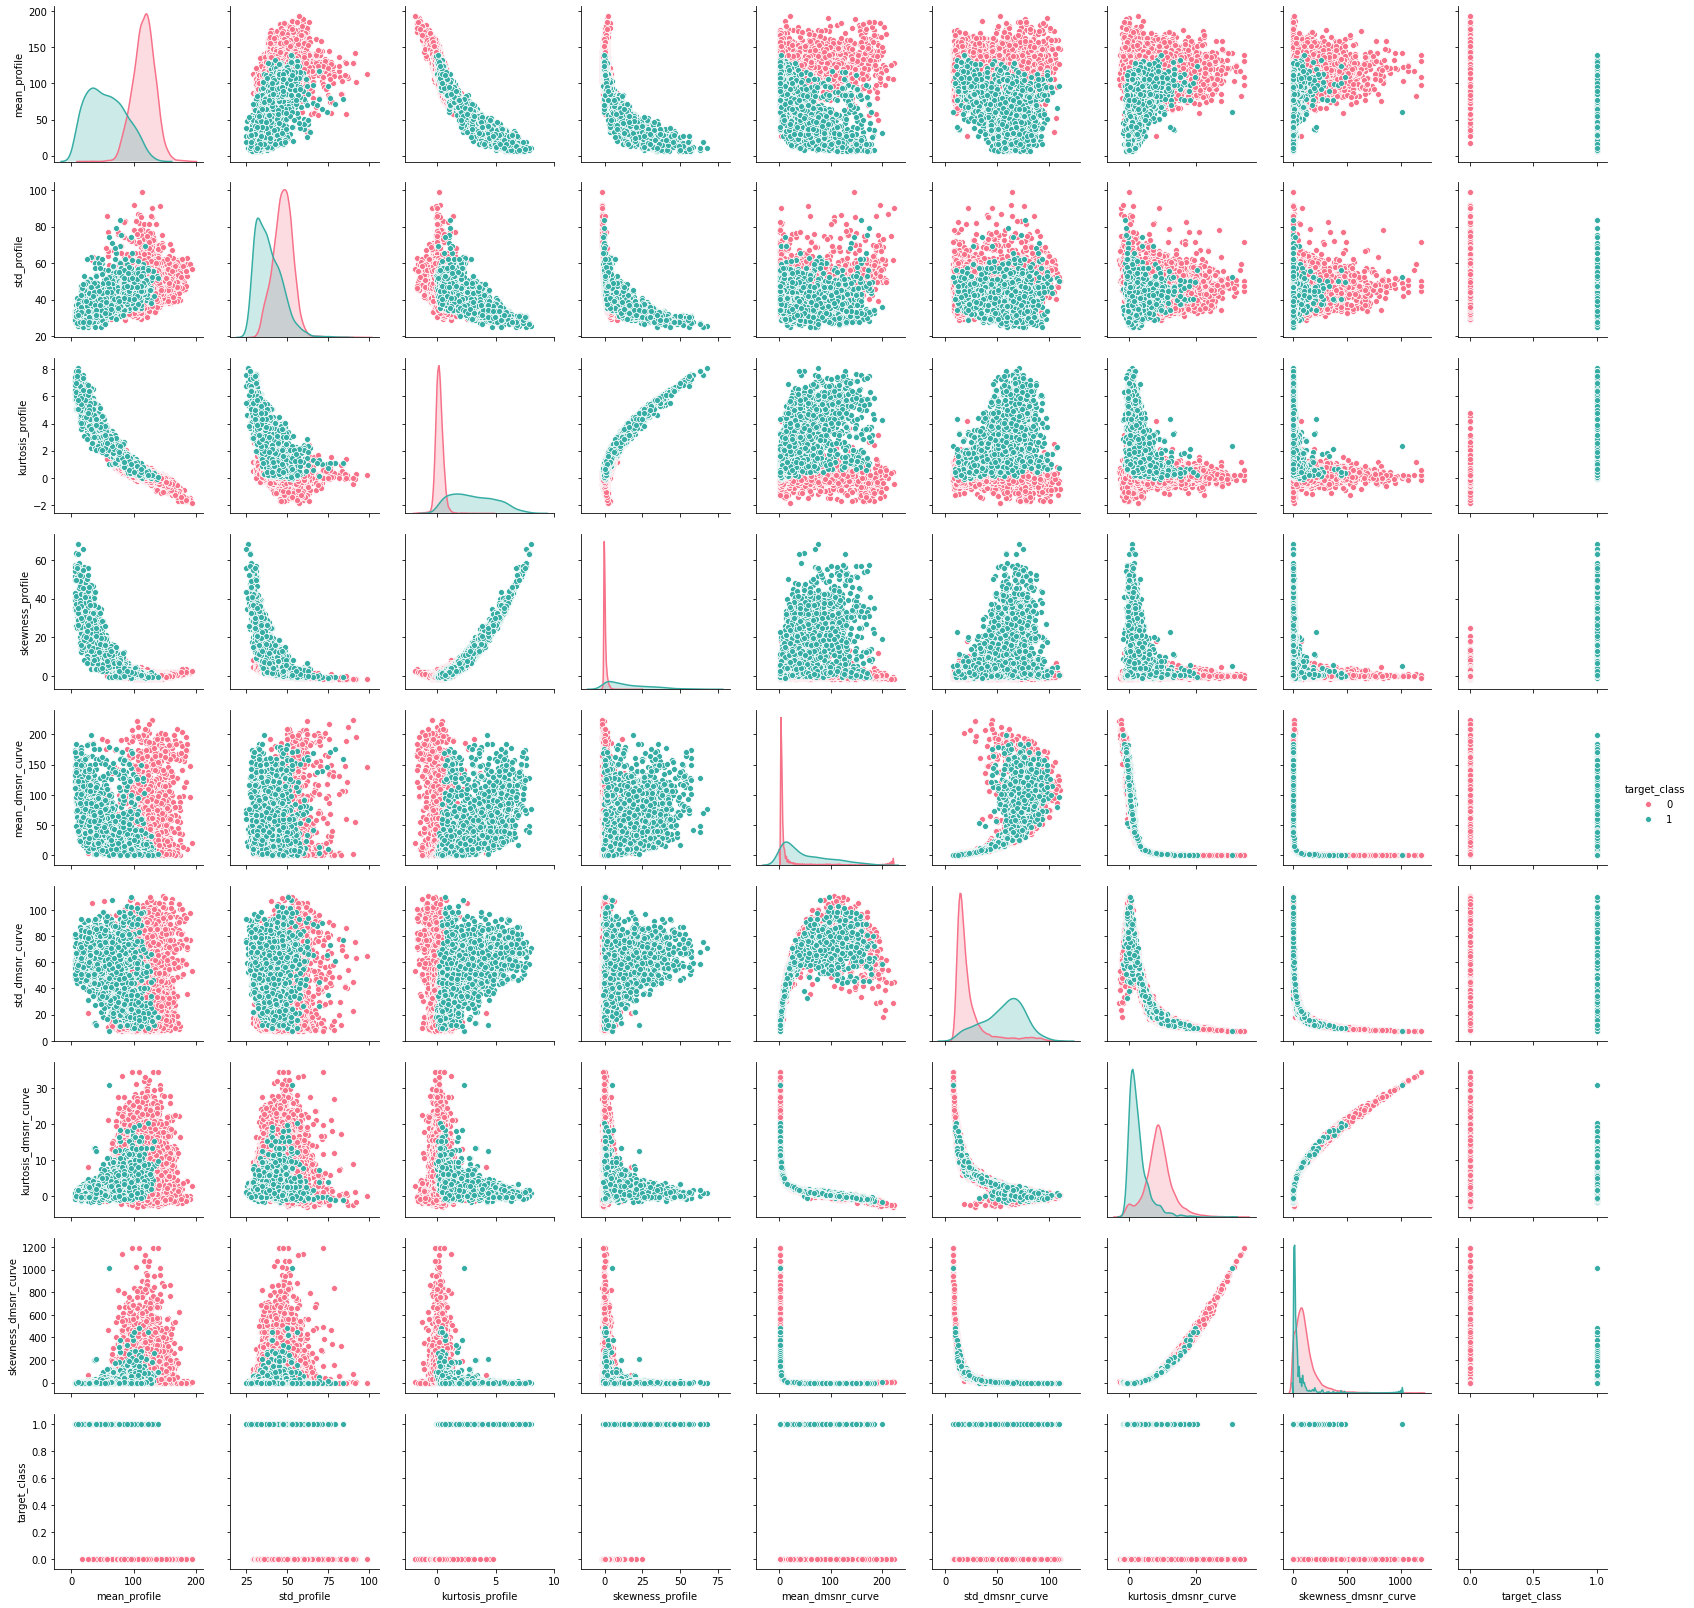

In [28]:
sns.pairplot(data=HTRU2,
             palette="husl",
             hue="target_class")

For the most part, the two classes separate out quite well.

Correlation of the features versus Class.

In [29]:
HTRU2.corr()['target_class'].sort_values(ascending=False)

target_class            1.000000
kurtosis_profile        0.791591
skewness_profile        0.709528
std_dmsnr_curve         0.491535
mean_dmsnr_curve        0.400876
skewness_dmsnr_curve   -0.259117
std_profile            -0.363708
kurtosis_dmsnr_curve   -0.390816
mean_profile           -0.673181
Name: target_class, dtype: float64

A plot of the correlations.

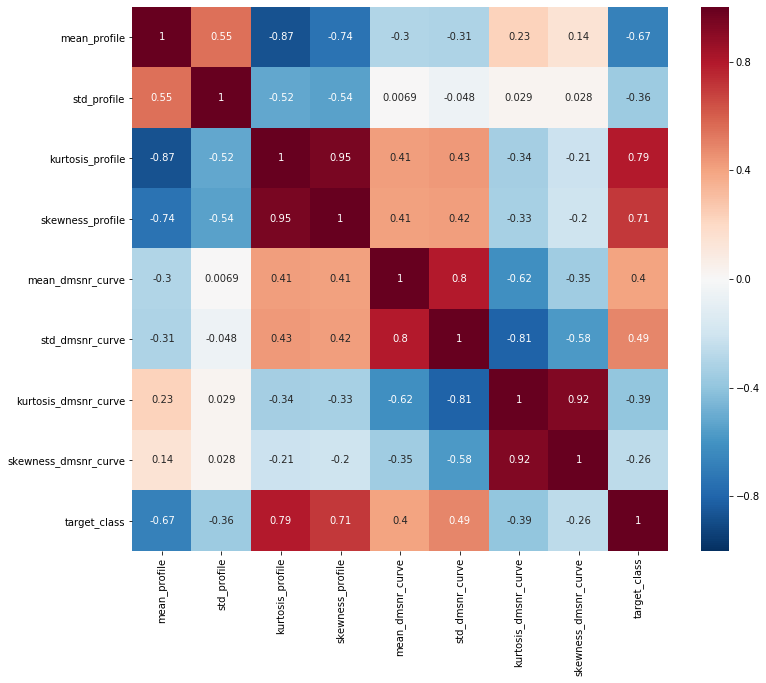

In [30]:
correlation = HTRU2.corr()
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [44]:
feat = list(HTRU2)

In [45]:
feat.remove('target_class')
feat

['mean_profile',
 'std_profile',
 'kurtosis_profile',
 'skewness_profile',
 'mean_dmsnr_curve',
 'std_dmsnr_curve',
 'kurtosis_dmsnr_curve',
 'skewness_dmsnr_curve']

For the next plots, taget class will be removed from the features list and plotted against.

A bar plot of Class for each of the eight features.

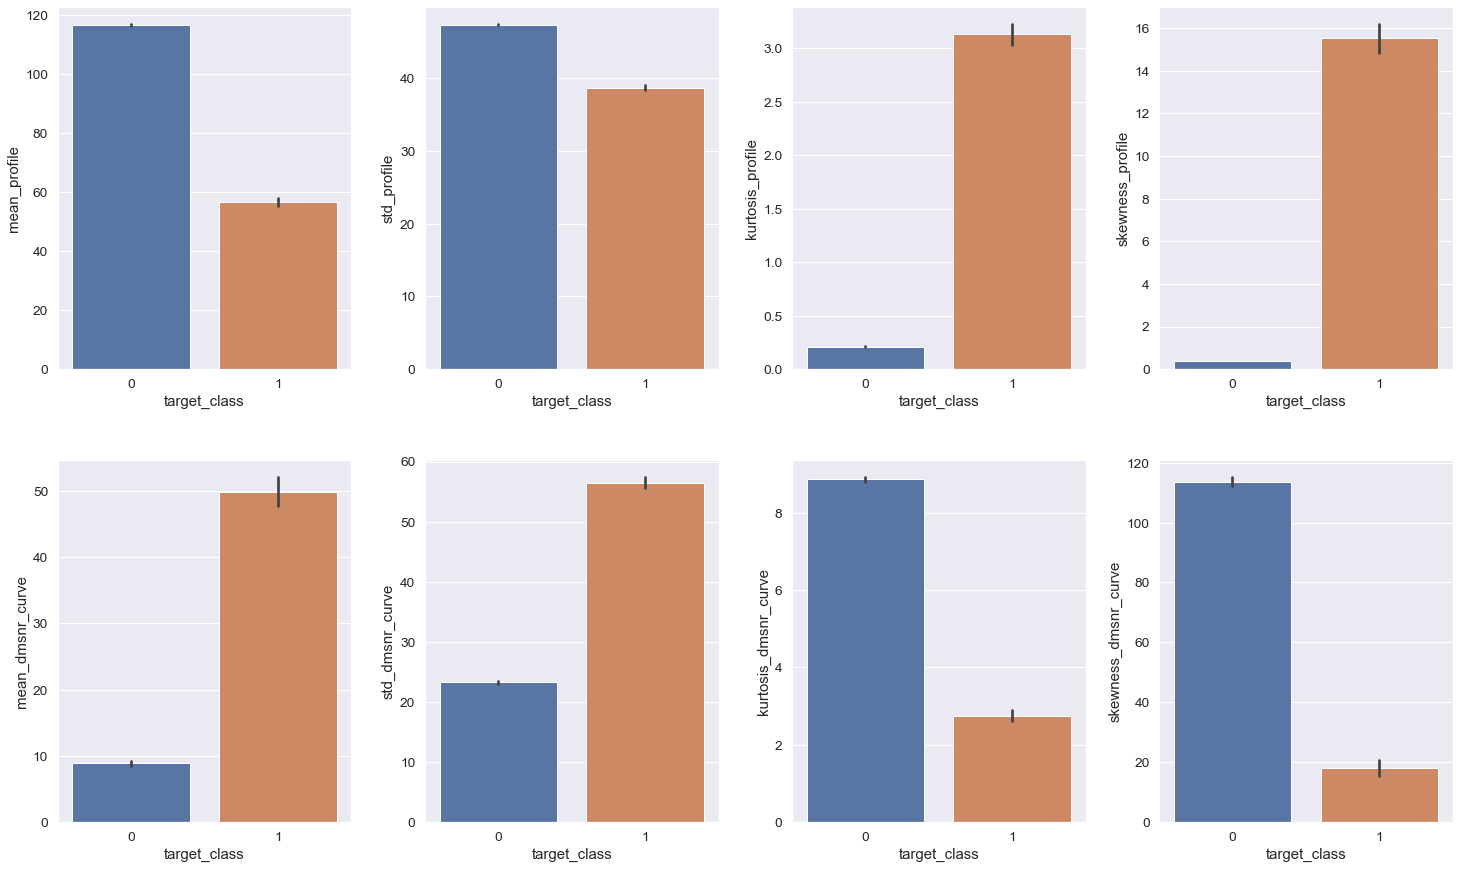

In [46]:
sns.set(font_scale=1.25)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25, wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.barplot(x = 'target_class', y = i, data = HTRU2, ax=ax)

for ax in axes_list:
    ax.remove()

A box plot of Class for each of the eight features.

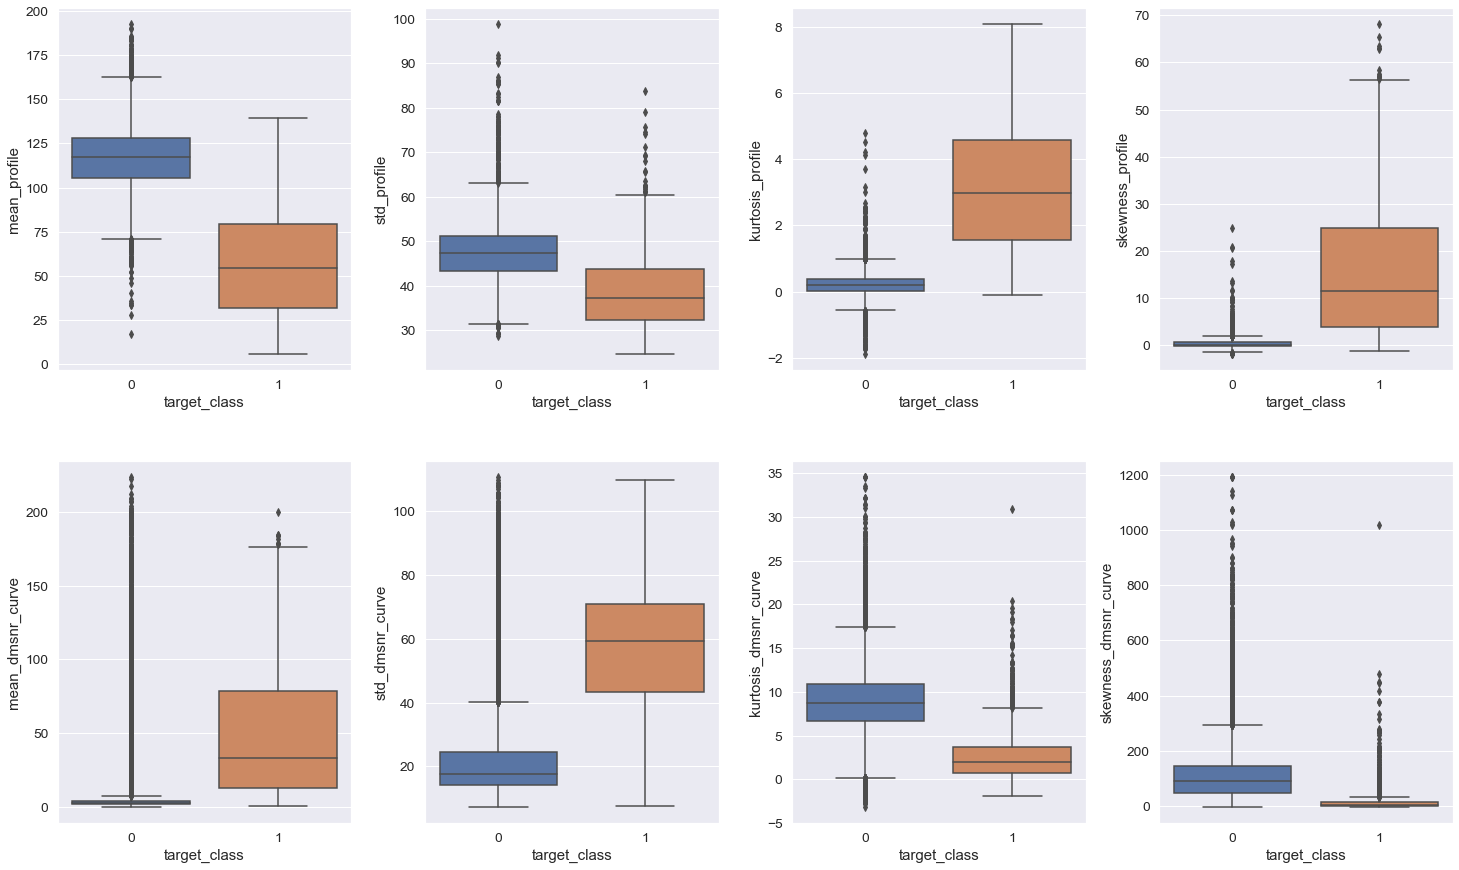

In [47]:
sns.set(font_scale=1.25)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25, wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.boxplot(x = 'target_class', y = i, data = HTRU2, ax=ax)

for ax in axes_list:
    ax.remove()

Overall, the data seems fairly well behaved. There are no null entries or duplicate rows. There are some outliers but none seem too extreme.

The data appears to be quite clean and is ready to be modelled.

## Models

There are a number of machine learning models that can be used for this project. Since this is a binary classification problem, the following models will be built:
 - Logistic Regression
 - K-Nearest Neighbors (KNN)
 - Support Vector Machine (SVM)
 - Decision Tree
 - Random Forest
 - Extra Trees
 - AdaBoost
 - Gradient Boosting
 - Gaussian Naive Bayes
 - Bernoulli Naive Bayes
 - Stochastic Gradient Descent

In addition, a artificial neural network will also be built.

Using Scikit-learn:
 - Multilayer Perceptron (MLP)


Due to time and computing restraints, full model optimization by tuning all hyperparameters is not possible. Instead, where applicable, a few top hyperparameters will be tuned before building the final model. Some tuning will be done separately in steps to allow quicker results. Ideally, everything would tune together, but this quickly results in excessive amounts of model cases to be tested.

### Model Preparation

Separate the data into the features (x) and target (y).

In [48]:
x = HTRU2.drop(['target_class'], axis=1)
y = HTRU2['target_class']

Split the data into training and test sets. For these models, 80% of the data will be used for training and 20% will be used for final testing.

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

Scale the data. Note that it is fit and transformed only to the training set. The test set is only transformed.

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Some models will have their hyperparameters tuned before building the final model. This will be done with the assistance of GridSearchCV. For these runs, a scaled fit will be made with all of the data as it will all be used to train the model at some point during cross-validation.

In [51]:
xall = scaler.fit_transform(x)
yall = y

### Model Evaluation

There are a number of metrics that will be used to evaluate the performance of the final models.

The confusion matrix is quite useful in evaluating a classification model. An example is shown below.

True Negative (TN) - The cases where it is actually negative and the model predicts negative.

False Positive (FP) - The cases where it is actually negative but the model predicts positive.

False Negative (FN) - The cases where it is actually positive but the model predicts negative.

True Positive (TP) - The cases where it is actually positive and the model predicts positive.

Other evaluation metrics can be calculated from the confusion matrix:
- Accuracy - Ratio of correct predictions over total predictions   <font color=blue>__(TP+TN)/(TP+TN+FP+FN)__</font>
- Precision - Expresses the proportion of the data points the model says was relevant actually were relevant   <font color=blue>__TP/(TP+FP)__</font>
- Recall - Expresses the ability to find all relevant instances in a dataset   <font color=blue>__TP/(TP+FN)__</font>
- F1 Score - The harmonic mean of precision and recall taking both metrics into account   <font color=blue>__2\*(precision\*recall)/(precision+recall)__</font>
- False Positive Rate - (aka Specificity) Corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points   <font color=blue>__FP/(TN+FP)__</font>

Note: In this project, negative represents the non-pulsar class and positive represents the pulsar class.


For this project, the final ranking will be based on accuracy score. As such, when model optimization is performed the models will be tuned to achieve the best accuracy score. A final model will be built using optimized hyperparameters. Other evaluation metrics of the model will be calculated including accuracy, precision, recall, F1 score, and false positive rate. A confusion matrix will also be plotted. To reduce bias, a 5-fold cross-validation will be run on the final model and the mean accuracy score will be used.

### Functions

A few functions will be defined to streamline the evaluation of the models.

This function ranks test results from optimization runs and presents the best option to use in the final model.

In [98]:
def Ranked_Test_Results(gr):
    print("Ranked Test Results")
    means = gr.cv_results_['mean_test_score']
    params = gr.cv_results_['params']
    mp = []
    for mean, param in zip(means, params):
        entry = "%f with: %s" % (mean, param)
        mp.append(entry)
    mp.sort(reverse=True)
    print(*mp, sep='\n')
    print("\nBest Option: %f using %s" % (gr.best_score_, gr.best_params_))

This function will plot the confusion matrix as an easy to read graph.

In [99]:
def Plot_Confusion_Matrix(cm):
    classes = ['Negative', 'Positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize=(4,4))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=plt.cm.cividis_r, cbar=False, annot_kws={"size":16})
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')

This function will run the model and calculate the various evaluation metrics of the model including accuracy, precision, recall, F1 score, and false positive rate. A confusion matrix will also be generated. 

It will also run the model as a 5-fold cross-validation and return the mean accuracy score of the five runs. During the 5-fold cross-validation scaling, the training data will be fit and transformed at each stage and the test data will only be transformed.

The metrics will be returned as a pandas series.

In [103]:
def Model_Eval(name, model, x_train, y_train, x_test, y_test, x, y, time):
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    Plot_Confusion_Matrix(cm)
    TN, FP, FN, TP = cm.ravel()
    FalsePosRate = FP / (TN + FP)
    scaler = StandardScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
    scores = cross_val_score(pipeline, x, y, cv=5, n_jobs=-1)
    print('5-Fold Cross-Validation Accuracy Scores: ', scores)
    cv_accuracy = scores.mean()
    return pd.Series([name, accuracy, precision, recall, f1score, FalsePosRate, cv_accuracy, time])

This dataframe will hold the evaluation results from each final model run.

In [139]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
                                'False Positive Rate', '5-Fold Cross-Validation Accuracy Score', 'Time'])

### Logistic Regression Model

Logistic regression is a classification algorithm that transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to a discrete set of classes.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97458101 0.97905028 0.98212291 0.97765363 0.97792063]


Model                                     Logistic Regression
Accuracy                                             0.979609
Precision                                            0.944251
Recall                                                0.82622
F1 Score                                             0.881301
False Positive Rate                                0.00492005
5-Fold Cross-Validation Accuracy Score               0.978266
Time                                                0.0685139
dtype: object

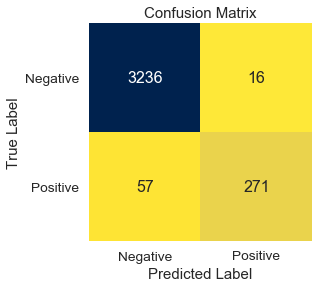

In [140]:
start = time.time()
LRmodel = LogisticRegression(random_state=42).fit(x_train, y_train)
LRmodel_time = time.time() - start
stats = Model_Eval('Logistic Regression', LRmodel, x_train, y_train, x_test, y_test, x, y, LRmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### K-Nearest Neighbors (KNN) Model

K-Nearest Neighbors is a non-parametric instance-based algorithm. Classification is computed from a simple majority vote of the k-nearest neighbours of each point.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_neighbors parameter to use in the model.

In [58]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
gr = knn_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.977819 with: {'n_neighbors': 5}
0.977707 with: {'n_neighbors': 20}
0.977595 with: {'n_neighbors': 23}
0.977595 with: {'n_neighbors': 22}
0.977595 with: {'n_neighbors': 21}
0.977539 with: {'n_neighbors': 19}
0.977539 with: {'n_neighbors': 17}
0.977484 with: {'n_neighbors': 15}
0.977428 with: {'n_neighbors': 18}
0.977428 with: {'n_neighbors': 16}
0.977428 with: {'n_neighbors': 12}
0.977372 with: {'n_neighbors': 4}
0.977316 with: {'n_neighbors': 6}
0.977316 with: {'n_neighbors': 14}
0.977316 with: {'n_neighbors': 10}
0.977204 with: {'n_neighbors': 24}
0.977204 with: {'n_neighbors': 11}
0.977092 with: {'n_neighbors': 8}
0.977092 with: {'n_neighbors': 13}
0.977037 with: {'n_neighbors': 7}
0.977037 with: {'n_neighbors': 3}
0.976981 with: {'n_neighbors': 9}
0.976701 with: {'n_neighbors': 2}
0.970332 with: {'n_neighbors': 1}

Best Option: 0.977819 using {'n_neighbors': 5}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97625698 0.97877095 0.98072626 0.97709497 0.97568474]


Model                                     K-Nearest Neighbors (KNN)
Accuracy                                                   0.980447
Precision                                                  0.932886
Recall                                                     0.847561
F1 Score                                                   0.888179
False Positive Rate                                      0.00615006
5-Fold Cross-Validation Accuracy Score                     0.977707
Time                                                      0.0140045
dtype: object

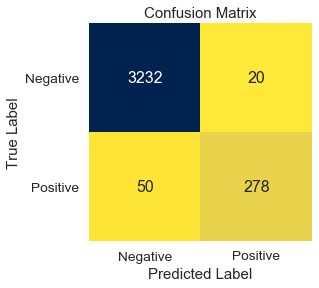

In [141]:
start = time.time()
KNNmodel = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
KNNmodel_time = time.time() - start
stats = Model_Eval('K-Nearest Neighbors (KNN)', KNNmodel, x_train, y_train, x_test, y_test, x, y, KNNmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Support Vector Machine (SVM) Model

Support Vector Machine is an algorithm that looks for a hyperplane that distinctly separates the data points into categories. The optimal hyperplane has the maximum distance from the nearest points of all classes.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best kernel, C, and gamma parameters to use in the model.

In [60]:
svm = SVC(max_iter=100000, random_state=42)
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
              {'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01], 'kernel': ['rbf']}]
svm_gscv = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
gr = svm_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978936 with: {'C': 100, 'kernel': 'linear'}
0.978824 with: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.978769 with: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.978713 with: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.978657 with: {'C': 10, 'kernel': 'linear'}
0.978657 with: {'C': 1, 'kernel': 'linear'}
0.978489 with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.978322 with: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.978042 with: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976254 with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.976087 with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.975863 with: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.972679 with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.972511 with: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.960107 with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.722483 with: {'C': 1000, 'kernel': 'linear'}

Best Option: 0.978936 using {'C': 100, 'kernel': 'linear'}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97541899 0.98072626 0.98240223 0.9773743  0.97764114]


Model                                     Support Vector Machine (SVM)
Accuracy                                                      0.980168
Precision                                                     0.950877
Recall                                                         0.82622
F1 Score                                                      0.884176
False Positive Rate                                         0.00430504
5-Fold Cross-Validation Accuracy Score                        0.978713
Time                                                           7.67578
dtype: object

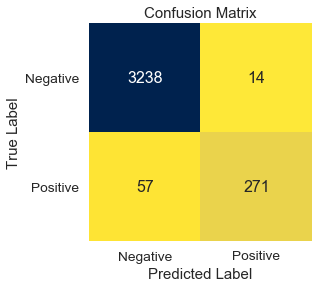

In [142]:
start = time.time()
SVMmodel = SVC(kernel='linear', C=100, random_state=42).fit(x_train, y_train)
SVMmodel_time = time.time() - start
stats = Model_Eval('Support Vector Machine (SVM)', SVMmodel, x_train, y_train, x_test, y_test, x, y, SVMmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Decision Tree Model

A decision tree is a tree where each node represents a feature, each link represents a decision and each leaf represents an outcome. Given data attributes together with classes, a decision tree produces a sequence of rules that can be used to classify the data.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [62]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,20), 
              'min_samples_split': np.arange(2,40)}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
gr = dt_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978936 with: {'max_depth': 5, 'min_samples_split': 32}
0.978936 with: {'max_depth': 5, 'min_samples_split': 31}
0.978880 with: {'max_depth': 5, 'min_samples_split': 39}
0.978880 with: {'max_depth': 5, 'min_samples_split': 38}
0.978880 with: {'max_depth': 5, 'min_samples_split': 37}
0.978880 with: {'max_depth': 5, 'min_samples_split': 36}
0.978880 with: {'max_depth': 5, 'min_samples_split': 35}
0.978880 with: {'max_depth': 5, 'min_samples_split': 30}
0.978880 with: {'max_depth': 5, 'min_samples_split': 29}
0.978880 with: {'max_depth': 5, 'min_samples_split': 28}
0.978880 with: {'max_depth': 5, 'min_samples_split': 27}
0.978880 with: {'max_depth': 5, 'min_samples_split': 26}
0.978824 with: {'max_depth': 5, 'min_samples_split': 9}
0.978824 with: {'max_depth': 5, 'min_samples_split': 8}
0.978824 with: {'max_depth': 5, 'min_samples_split': 7}
0.978824 with: {'max_depth': 5, 'min_samples_split': 6}
0.978824 with: {'max_depth': 5, 'min_samples_split': 5}
0.978824 with: {

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97709497 0.97905028 0.98044693 0.97653631 0.98155394]


Model                                     Decision Tree
Accuracy                                       0.980726
Precision                                      0.930233
Recall                                         0.853659
F1 Score                                       0.890302
False Positive Rate                          0.00645756
5-Fold Cross-Validation Accuracy Score         0.978936
Time                                           0.147802
dtype: object

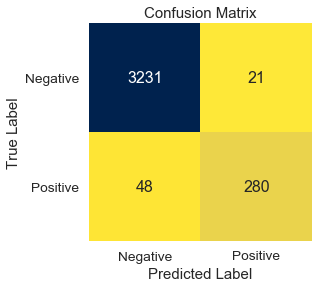

In [143]:
start = time.time()
DTmodel = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=31, random_state=42).fit(x_train, y_train)
DTmodel_time = time.time() - start

stats = Model_Eval('Decision Tree', DTmodel, x_train, y_train, x_test, y_test, x, y, DTmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Random Forest Model

Random Forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction. This works well as a large number of relatively uncorrelated trees operating as a committee will outperform any of the individual constituent trees.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best criterion parameter to use in the model.

In [64]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'criterion': ['entropy', 'gini']}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978098 with: {'criterion': 'entropy'}
0.977763 with: {'criterion': 'gini'}

Best Option: 0.978098 using {'criterion': 'entropy'}


Building on the previous run, an optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [65]:
rf = RandomForestClassifier(criterion='entropy', random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979160 with: {'n_estimators': 99}
0.979160 with: {'n_estimators': 121}
0.979160 with: {'n_estimators': 119}
0.979104 with: {'n_estimators': 137}
0.979104 with: {'n_estimators': 101}
0.979048 with: {'n_estimators': 149}
0.979048 with: {'n_estimators': 129}
0.979048 with: {'n_estimators': 125}
0.979048 with: {'n_estimators': 123}
0.979048 with: {'n_estimators': 103}
0.978992 with: {'n_estimators': 93}
0.978992 with: {'n_estimators': 155}
0.978992 with: {'n_estimators': 131}
0.978992 with: {'n_estimators': 127}
0.978992 with: {'n_estimators': 115}
0.978992 with: {'n_estimators': 113}
0.978992 with: {'n_estimators': 109}
0.978992 with: {'n_estimators': 107}
0.978992 with: {'n_estimators': 105}
0.978936 with: {'n_estimators': 97}
0.978936 with: {'n_estimators': 95}
0.978936 with: {'n_estimators': 91}
0.978936 with: {'n_estimators': 185}
0.978936 with: {'n_estimators': 181}
0.978936 with: {'n_estimators': 153}
0.978936 with: {'n_estimators': 151}
0.978936 with: {'n_esti

Building on the previous runs, an optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [66]:
rf = RandomForestClassifier(n_estimators=99, criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,30), 
              'min_samples_split': np.arange(2,25)}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gr = rf_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979271 with: {'max_depth': 27, 'min_samples_split': 4}
0.979216 with: {'max_depth': 26, 'min_samples_split': 4}
0.979160 with: {'max_depth': 28, 'min_samples_split': 4}
0.979160 with: {'max_depth': 27, 'min_samples_split': 5}
0.979160 with: {'max_depth': 26, 'min_samples_split': 5}
0.979160 with: {'max_depth': 24, 'min_samples_split': 5}
0.979160 with: {'max_depth': 24, 'min_samples_split': 4}
0.979104 with: {'max_depth': 29, 'min_samples_split': 4}
0.979104 with: {'max_depth': 29, 'min_samples_split': 2}
0.979104 with: {'max_depth': 26, 'min_samples_split': 2}
0.979104 with: {'max_depth': 23, 'min_samples_split': 4}
0.979104 with: {'max_depth': 22, 'min_samples_split': 2}
0.979104 with: {'max_depth': 21, 'min_samples_split': 5}
0.979104 with: {'max_depth': 20, 'min_samples_split': 24}
0.979104 with: {'max_depth': 16, 'min_samples_split': 11}
0.979048 with: {'max_depth': 25, 'min_samples_split': 5}
0.979048 with: {'max_depth': 25, 'min_samples_split': 2}
0.979048 

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97709497 0.98296089 0.98212291 0.97541899 0.97875908]


Model                                     Random Forest
Accuracy                                       0.980726
Precision                                      0.919094
Recall                                         0.865854
F1 Score                                        0.89168
False Positive Rate                          0.00768758
5-Fold Cross-Validation Accuracy Score         0.979271
Time                                            3.37047
dtype: object

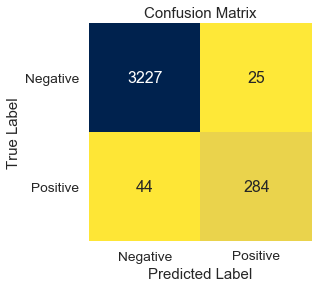

In [144]:
start = time.time()
RFmodel = RandomForestClassifier(n_estimators=99, max_depth=27, min_samples_split=4, 
                                 criterion='entropy', random_state=42).fit(x_train, y_train)
RFmodel_time = time.time() - start

stats = Model_Eval('Random Forest', RFmodel, x_train, y_train, x_test, y_test, x, y, RFmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

<font color=purple>__Feature Importance__</font>

As an added benefit to running the random forest model, the importance of each feature can be calculated for this model.

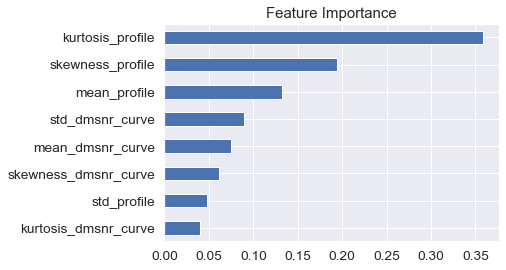

In [68]:
feat_importances = pd.Series(RFmodel.feature_importances_, index=x.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh', title='Feature Importance')

Clearly, Excess Kurtosis of the Integrated Profile is the most important feature influencing this model. Perhaps the model could be improved by looking at features, and even feature engineering, in more detail.

### Extra Trees Model

Extra Trees, standing for extremely randomized trees, is a variant of the random forest. Unlike a random forest, at each step the entire sample is used and decision boundaries are picked at random, rather than the best one.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [69]:
et = ExtraTreesClassifier(criterion='entropy', random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
et_gscv = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)
gr = et_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978769 with: {'n_estimators': 159}
0.978769 with: {'n_estimators': 145}
0.978713 with: {'n_estimators': 181}
0.978713 with: {'n_estimators': 157}
0.978713 with: {'n_estimators': 147}
0.978657 with: {'n_estimators': 63}
0.978657 with: {'n_estimators': 37}
0.978657 with: {'n_estimators': 25}
0.978657 with: {'n_estimators': 17}
0.978657 with: {'n_estimators': 169}
0.978657 with: {'n_estimators': 163}
0.978657 with: {'n_estimators': 155}
0.978657 with: {'n_estimators': 151}
0.978657 with: {'n_estimators': 149}
0.978657 with: {'n_estimators': 137}
0.978601 with: {'n_estimators': 187}
0.978601 with: {'n_estimators': 179}
0.978601 with: {'n_estimators': 173}
0.978601 with: {'n_estimators': 171}
0.978601 with: {'n_estimators': 165}
0.978545 with: {'n_estimators': 65}
0.978545 with: {'n_estimators': 199}
0.978545 with: {'n_estimators': 197}
0.978545 with: {'n_estimators': 189}
0.978545 with: {'n_estimators': 185}
0.978545 with: {'n_estimators': 183}
0.978545 with: {'n_esti

Building on the previous run, an optimization run will be done trying to find the best max_depth and min_samples_split parameters to use in the model.

In [70]:
et = ExtraTreesClassifier(n_estimators=145, criterion='entropy', random_state=42)
param_grid = {'max_depth': np.arange(1,30), 
              'min_samples_split': np.arange(2,25)}
et_gscv = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)
gr = et_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978880 with: {'max_depth': 26, 'min_samples_split': 2}
0.978769 with: {'max_depth': 23, 'min_samples_split': 2}
0.978769 with: {'max_depth': 21, 'min_samples_split': 5}
0.978657 with: {'max_depth': 29, 'min_samples_split': 5}
0.978657 with: {'max_depth': 29, 'min_samples_split': 4}
0.978657 with: {'max_depth': 29, 'min_samples_split': 3}
0.978601 with: {'max_depth': 28, 'min_samples_split': 6}
0.978601 with: {'max_depth': 26, 'min_samples_split': 3}
0.978545 with: {'max_depth': 29, 'min_samples_split': 9}
0.978545 with: {'max_depth': 25, 'min_samples_split': 2}
0.978545 with: {'max_depth': 22, 'min_samples_split': 2}
0.978545 with: {'max_depth': 21, 'min_samples_split': 2}
0.978489 with: {'max_depth': 27, 'min_samples_split': 7}
0.978489 with: {'max_depth': 26, 'min_samples_split': 5}
0.978489 with: {'max_depth': 25, 'min_samples_split': 9}
0.978489 with: {'max_depth': 24, 'min_samples_split': 9}
0.978489 with: {'max_depth': 22, 'min_samples_split': 3}
0.978433 wi

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.9773743  0.98184358 0.98044693 0.97709497 0.97764114]


Model                                     Extra Trees
Accuracy                                     0.980726
Precision                                    0.921824
Recall                                       0.862805
F1 Score                                     0.891339
False Positive Rate                        0.00738007
5-Fold Cross-Validation Accuracy Score        0.97888
Time                                           1.1186
dtype: object

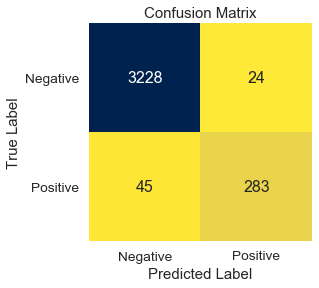

In [145]:
start = time.time()
ETmodel = ExtraTreesClassifier(n_estimators=145, max_depth=26, min_samples_split=2, 
                               criterion='entropy', random_state=42).fit(x_train, y_train)
ETmodel_time = time.time() - start

stats = Model_Eval('Extra Trees', ETmodel, x_train, y_train, x_test, y_test, x, y, ETmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### AdaBoost Model

AdaBoost, short for adaptive boosting, combines multiple weak classifiers into a single strong classifier. It works by putting more weight on difficult to classify instances and less on those already handled well.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [73]:
adab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
adab_gscv = GridSearchCV(adab, param_grid, cv=5, n_jobs=-1)
gr = adab_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978322 with: {'n_estimators': 123}
0.978266 with: {'n_estimators': 191}
0.978266 with: {'n_estimators': 187}
0.978266 with: {'n_estimators': 113}
0.978210 with: {'n_estimators': 121}
0.978210 with: {'n_estimators': 111}
0.978154 with: {'n_estimators': 195}
0.978154 with: {'n_estimators': 185}
0.978154 with: {'n_estimators': 183}
0.978154 with: {'n_estimators': 131}
0.978154 with: {'n_estimators': 119}
0.978154 with: {'n_estimators': 117}
0.978154 with: {'n_estimators': 109}
0.978098 with: {'n_estimators': 197}
0.978098 with: {'n_estimators': 193}
0.978098 with: {'n_estimators': 181}
0.978098 with: {'n_estimators': 179}
0.978098 with: {'n_estimators': 151}
0.978098 with: {'n_estimators': 149}
0.978098 with: {'n_estimators': 145}
0.978098 with: {'n_estimators': 115}
0.978042 with: {'n_estimators': 199}
0.978042 with: {'n_estimators': 189}
0.978042 with: {'n_estimators': 177}
0.978042 with: {'n_estimators': 175}
0.978042 with: {'n_estimators': 163}
0.978042 with: {'n

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97513966 0.98072626 0.98212291 0.97653631 0.97708217]


Model                                       AdaBoost
Accuracy                                    0.980447
Precision                                   0.935811
Recall                                      0.844512
F1 Score                                    0.887821
False Positive Rate                       0.00584256
5-Fold Cross-Validation Accuracy Score      0.978321
Time                                         2.44839
dtype: object

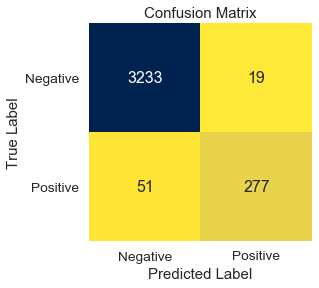

In [146]:
start = time.time()
AdaBmodel = AdaBoostClassifier(n_estimators=123, random_state=42).fit(x_train, y_train)
AdaBmodel_time = time.time() - start

stats = Model_Eval('AdaBoost', AdaBmodel, x_train, y_train, x_test, y_test, x, y, AdaBmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Gradient Boosting Model

Gradient Boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It trains many models in a gradual, additive and sequential manner.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best n_estimators parameter to use in the model.

In [75]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': np.arange(1,200,2)}
gb_gscv = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1)
gr = gb_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'n_estimators': 25}
0.979439 with: {'n_estimators': 19}
0.979383 with: {'n_estimators': 29}
0.979383 with: {'n_estimators': 27}
0.979383 with: {'n_estimators': 23}
0.979383 with: {'n_estimators': 21}
0.979216 with: {'n_estimators': 33}
0.979216 with: {'n_estimators': 31}
0.979104 with: {'n_estimators': 17}
0.979048 with: {'n_estimators': 37}
0.979048 with: {'n_estimators': 35}
0.978992 with: {'n_estimators': 41}
0.978936 with: {'n_estimators': 43}
0.978936 with: {'n_estimators': 39}
0.978880 with: {'n_estimators': 15}
0.978601 with: {'n_estimators': 47}
0.978601 with: {'n_estimators': 45}
0.978545 with: {'n_estimators': 51}
0.978489 with: {'n_estimators': 49}
0.978433 with: {'n_estimators': 53}
0.978266 with: {'n_estimators': 57}
0.978266 with: {'n_estimators': 13}
0.978154 with: {'n_estimators': 55}
0.978042 with: {'n_estimators': 61}
0.977986 with: {'n_estimators': 67}
0.977986 with: {'n_estimators': 59}
0.977930 with: {'n_estimators': 69}
0.977930

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97709497 0.98184358 0.98044693 0.97849162 0.97987703]


Model                                     Gradient Boosting
Accuracy                                           0.979888
Precision                                          0.923841
Recall                                              0.85061
F1 Score                                           0.885714
False Positive Rate                              0.00707257
5-Fold Cross-Validation Accuracy Score             0.979551
Time                                               0.338708
dtype: object

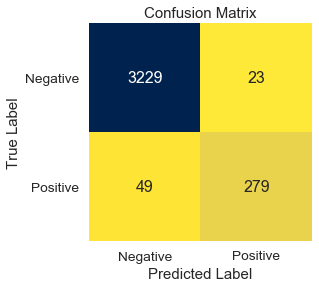

In [147]:
start = time.time()
GBmodel = GradientBoostingClassifier(n_estimators=25, random_state=42).fit(x_train, y_train)
GBmodel_time = time.time() - start
stats = Model_Eval('Gradient Boosting', GBmodel, x_train, y_train, x_test, y_test, x, y, GBmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Gaussian Naive Bayes Model

Naive Bayes is an algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Gaussian Naive Bayes assumes the attributes have a Gaussian distribution.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.96061453 0.92374302 0.94273743 0.92849162 0.96450531]


Model                                     Gaussian Naive Bayes
Accuracy                                              0.942737
Precision                                             0.638202
Recall                                                0.865854
F1 Score                                              0.734799
False Positive Rate                                   0.049508
5-Fold Cross-Validation Accuracy Score                0.944018
Time                                                 0.0070014
dtype: object

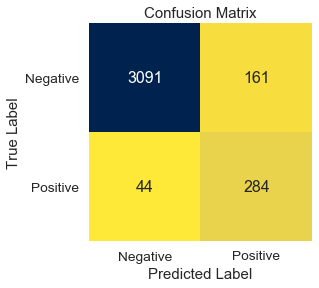

In [148]:
start = time.time()
GNBCmodel = GaussianNB().fit(x_train, y_train)
GNBCmodel_time = time.time() - start

stats = Model_Eval('Gaussian Naive Bayes', GNBCmodel, x_train, y_train, x_test, y_test, x, y, GNBCmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Bernoulli Naive Bayes Model

Bernoulli Naive Bayes implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions.

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.95307263 0.95111732 0.94469274 0.94916201 0.95612074]


Model                                     Bernoulli Naive Bayes
Accuracy                                               0.952514
Precision                                              0.687204
Recall                                                 0.884146
F1 Score                                               0.773333
False Positive Rate                                   0.0405904
5-Fold Cross-Validation Accuracy Score                 0.950833
Time                                                 0.00656915
dtype: object

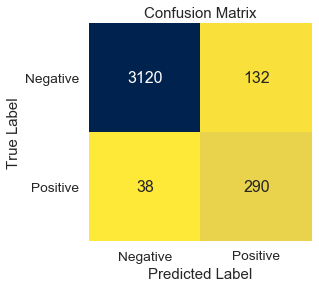

In [149]:
start = time.time()
BNBCmodel = BernoulliNB().fit(x_train, y_train)
BNBCmodel_time = time.time() - start

stats = Model_Eval('Bernoulli Naive Bayes', BNBCmodel, x_train, y_train, x_test, y_test, x, y, BNBCmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Stochastic Gradient Descent Model

Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. It is called stochastic because the method uses randomly selected samples to evaluate the gradients. It is a simple and very efficient approach to fit linear models which supports different loss functions and penalties for classification.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best alpha and penalty parameters to use in the model.

In [79]:
sgd = SGDClassifier(random_state=42)
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}
sgd_gscv = GridSearchCV(sgd, param_grid, cv=5, n_jobs=-1)
gr = sgd_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979439 with: {'alpha': 0.0001, 'penalty': 'none'}
0.979439 with: {'alpha': 0.0001, 'penalty': 'l2'}
0.978880 with: {'alpha': 0.0001, 'penalty': 'l1'}
0.978601 with: {'alpha': 0.001, 'penalty': 'l2'}
0.978489 with: {'alpha': 0.001, 'penalty': 'l1'}
0.978042 with: {'alpha': 0.001, 'penalty': 'none'}
0.977986 with: {'alpha': 0.01, 'penalty': 'none'}
0.976590 with: {'alpha': 0.1, 'penalty': 'none'}
0.974858 with: {'alpha': 0.01, 'penalty': 'l1'}
0.974802 with: {'alpha': 0.01, 'penalty': 'l2'}
0.972511 with: {'alpha': 1, 'penalty': 'none'}
0.969661 with: {'alpha': 0.1, 'penalty': 'l2'}
0.957090 with: {'alpha': 0.1, 'penalty': 'l1'}
0.949547 with: {'alpha': 1, 'penalty': 'l2'}
0.931277 with: {'alpha': 10, 'penalty': 'none'}
0.912616 with: {'alpha': 10, 'penalty': 'l2'}
0.908426 with: {'alpha': 10, 'penalty': 'l1'}
0.908426 with: {'alpha': 1, 'penalty': 'l1'}
0.862890 with: {'alpha': 100, 'penalty': 'none'}
0.745055 with: {'alpha': 100, 'penalty': 'l2'}
0.745055 with: {'

<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.97653631 0.97988827 0.98184358 0.97849162 0.97624371]


Model                                     Stochastic Gradient Descent
Accuracy                                                     0.979888
Precision                                                    0.941379
Recall                                                       0.832317
F1 Score                                                     0.883495
False Positive Rate                                        0.00522755
5-Fold Cross-Validation Accuracy Score                       0.978601
Time                                                        0.0410004
dtype: object

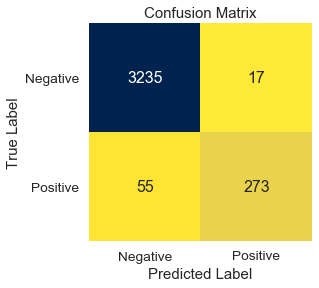

In [150]:
start = time.time()
SGDmodel = SGDClassifier(alpha=0.0001, penalty='none', random_state=42).fit(x_train, y_train)
SGDmodel_time = time.time() - start

stats = Model_Eval('Stochastic Gradient Descent', SGDmodel, x_train, y_train, x_test, y_test, x, y, SGDmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

### Artificial Neural Network (ANN) Models

Various multilayer perceptron models will be created using both Scikit-learn.

### <font color=navy>__Scikit-learn__</font>

### Multilayer Perceptron (MLP) Model

Multilayer Perceptron is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

<font color=red>__Model Optimization__</font>

An optimization run will be done trying to find the best hidden_layer_sizes parameter to use in the model.

In [81]:
mlp = MLPClassifier(activation='relu', solver='adam', batch_size=10, max_iter=500, random_state=42)
param_grid = {'hidden_layer_sizes': [(8,), (9,), (10,), (11,), (12,), (8,8), (11,11), (8,8,8)]}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.978992 with: {'hidden_layer_sizes': (8, 8)}
0.978992 with: {'hidden_layer_sizes': (11,)}
0.978657 with: {'hidden_layer_sizes': (12,)}
0.978545 with: {'hidden_layer_sizes': (11, 11)}
0.978489 with: {'hidden_layer_sizes': (10,)}
0.978377 with: {'hidden_layer_sizes': (9,)}
0.978210 with: {'hidden_layer_sizes': (8,)}
0.977763 with: {'hidden_layer_sizes': (8, 8, 8)}

Best Option: 0.978992 using {'hidden_layer_sizes': (11,)}


Building on the previous run, an optimization run will be done trying to find the best activation and solver parameters to use in the model.

In [82]:
mlp = MLPClassifier(hidden_layer_sizes=(11,), batch_size=10, max_iter=500, random_state=42)
param_grid = {'activation': ['relu', 'tanh'], 
              'solver': ['adam', 'sgd']}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'activation': 'tanh', 'solver': 'sgd'}
0.979439 with: {'activation': 'relu', 'solver': 'sgd'}
0.978992 with: {'activation': 'relu', 'solver': 'adam'}
0.978601 with: {'activation': 'tanh', 'solver': 'adam'}

Best Option: 0.979551 using {'activation': 'tanh', 'solver': 'sgd'}


Building on the previous runs, an optimization run will be done trying to find the best batch_size parameter to use in the model.

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(11,), activation='tanh', solver='sgd', max_iter=500, random_state=42)
param_grid = {'batch_size': [10, 20, 32, 50, 100]}
mlp_gscv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
gr = mlp_gscv.fit(xall, yall)
Ranked_Test_Results(gr)

Ranked Test Results
0.979551 with: {'batch_size': 10}
0.979048 with: {'batch_size': 20}
0.978433 with: {'batch_size': 32}
0.977986 with: {'batch_size': 50}
0.977148 with: {'batch_size': 100}

Best Option: 0.979551 using {'batch_size': 10}


<font color=green>__Final Model__</font>

5-Fold Cross-Validation Accuracy Scores:  [0.9773743  0.98324022 0.98100559 0.9773743  0.97959754]


Model                                     Multilayer Perceptron (MLP)
Accuracy                                                     0.981844
Precision                                                    0.931148
Recall                                                       0.865854
F1 Score                                                     0.897314
False Positive Rate                                        0.00645756
5-Fold Cross-Validation Accuracy Score                       0.979718
Time                                                          18.5378
dtype: object

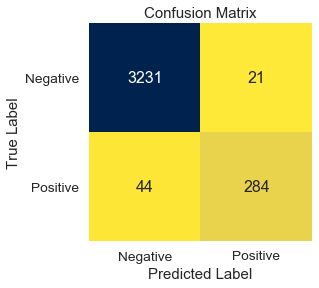

In [151]:
start = time.time()
MLPmodel = MLPClassifier(hidden_layer_sizes=(11,), activation='tanh', solver='sgd', batch_size=10, 
                         max_iter=500, random_state=42).fit(x_train, y_train)
MLPmodel_time = time.time() - start

stats = Model_Eval('Multilayer Perceptron (MLP)', MLPmodel, x_train, y_train, x_test, y_test, x, y, MLPmodel_time)
stats.index = results.columns
results = results.append(stats, ignore_index=True)
stats

## Results

The final results table for the 18 different models.

In [152]:
results.style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score,Time
Logistic Regression,0.979609,0.944251,0.82622,0.881301,0.00492005,0.978266,0.0685139
K-Nearest Neighbors (KNN),0.980447,0.932886,0.847561,0.888179,0.00615006,0.977707,0.0140045
Support Vector Machine (SVM),0.980168,0.950877,0.82622,0.884176,0.00430504,0.978713,7.67578
Decision Tree,0.980726,0.930233,0.853659,0.890302,0.00645756,0.978936,0.147802
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271,3.37047
Extra Trees,0.980726,0.921824,0.862805,0.891339,0.00738007,0.97888,1.1186
AdaBoost,0.980447,0.935811,0.844512,0.887821,0.00584256,0.978321,2.44839
Gradient Boosting,0.979888,0.923841,0.85061,0.885714,0.00707257,0.979551,0.338708
Gaussian Naive Bayes,0.942737,0.638202,0.865854,0.734799,0.049508,0.944018,0.0070014
Bernoulli Naive Bayes,0.952514,0.687204,0.884146,0.773333,0.0405904,0.950833,0.00656915


This table shows the evaluation metrics (accuracy, precision, recall, F1 score, false positive rate, and 5-fold cross-validation accuracy score) for all 12 models. Some models do better in some metrics than others. The table can be sorted according to the most important metrics. This will now be done for both 5-fold cross-calibration accuracy score and recall.

### 5-Fold Cross-Validation Accuracy Score

The results table sorted by 5-Fold Cross-Validation Accuracy Score.

In [153]:
results.sort_values(by=['5-Fold Cross-Validation Accuracy Score'], ascending=False).style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score,Time
Multilayer Perceptron (MLP),0.981844,0.931148,0.865854,0.897314,0.00645756,0.979718,18.5378
Gradient Boosting,0.979888,0.923841,0.85061,0.885714,0.00707257,0.979551,0.338708
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271,3.37047
Decision Tree,0.980726,0.930233,0.853659,0.890302,0.00645756,0.978936,0.147802
Extra Trees,0.980726,0.921824,0.862805,0.891339,0.00738007,0.97888,1.1186
Support Vector Machine (SVM),0.980168,0.950877,0.82622,0.884176,0.00430504,0.978713,7.67578
Stochastic Gradient Descent,0.979888,0.941379,0.832317,0.883495,0.00522755,0.978601,0.0410004
AdaBoost,0.980447,0.935811,0.844512,0.887821,0.00584256,0.978321,2.44839
Logistic Regression,0.979609,0.944251,0.82622,0.881301,0.00492005,0.978266,0.0685139
K-Nearest Neighbors (KNN),0.980447,0.932886,0.847561,0.888179,0.00615006,0.977707,0.0140045


A plot of the 5-Fold Cross-Validation Accuracy Scores.

(0.94, 0.985)

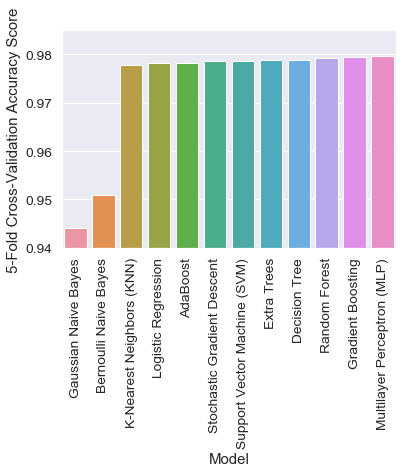

In [154]:
score = results.sort_values(by=['5-Fold Cross-Validation Accuracy Score'])
sns.barplot(x = 'Model', y = '5-Fold Cross-Validation Accuracy Score', data = score)
plt.xticks(rotation=90)
plt.ylim(0.94, 0.985)

Using 5-Fold Cross-Validation Accuracy Score as the metric, __MLP__ appears to be the best model.

### Recall

Recall (what % of positive cases were caught) is also an important metric. How do these models rank based on that?

The results table sorted by Recall.

In [155]:
results.sort_values(by=['Recall'], ascending=False).style.hide_index()

Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,5-Fold Cross-Validation Accuracy Score,Time
Bernoulli Naive Bayes,0.952514,0.687204,0.884146,0.773333,0.0405904,0.950833,0.00656915
Random Forest,0.980726,0.919094,0.865854,0.89168,0.00768758,0.979271,3.37047
Gaussian Naive Bayes,0.942737,0.638202,0.865854,0.734799,0.049508,0.944018,0.0070014
Multilayer Perceptron (MLP),0.981844,0.931148,0.865854,0.897314,0.00645756,0.979718,18.5378
Extra Trees,0.980726,0.921824,0.862805,0.891339,0.00738007,0.97888,1.1186
Decision Tree,0.980726,0.930233,0.853659,0.890302,0.00645756,0.978936,0.147802
Gradient Boosting,0.979888,0.923841,0.85061,0.885714,0.00707257,0.979551,0.338708
K-Nearest Neighbors (KNN),0.980447,0.932886,0.847561,0.888179,0.00615006,0.977707,0.0140045
AdaBoost,0.980447,0.935811,0.844512,0.887821,0.00584256,0.978321,2.44839
Stochastic Gradient Descent,0.979888,0.941379,0.832317,0.883495,0.00522755,0.978601,0.0410004


A plot of Recall.

(0.8, 0.9)

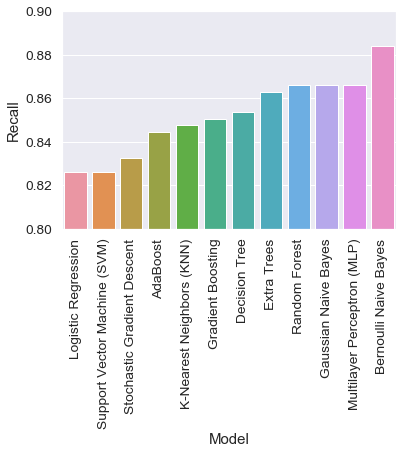

In [156]:
recalls = results.sort_values(by=['Recall'])
sns.barplot(x = 'Model', y = 'Recall', data = recalls)
plt.xticks(rotation=90)
plt.ylim(0.8, 0.9)

Using Recall as the metric, __Bernoulli Naive Bayes__ appears to be the best model.

Note that the models were tuned with accuracy score in mind. The rankings could be different if they were tuned to achieve the best recall rate instead.

### Which models performed the best with both accuracy score and recall in mind?

Plotting Recall versus 5-Fold Cross-Validation Accuracy Score.

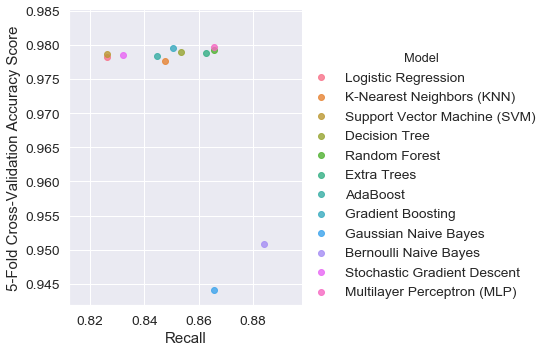

In [157]:
sns.lmplot('Recall', '5-Fold Cross-Validation Accuracy Score', hue='Model', data=results, fit_reg=False)

The upper-right corner of the plot contains the best models for this project based on recall and accuracy score. An argument could be made for either Random Forest or Multilayer Perceptron (MLP).

### Save the Best Models

For future use outside of this notebook, the best models will be 'pickled'.

Save the best model according to 5-fold cross-validation score: MLP.

In [92]:
filename1 = 'MLP_Model.sav'
pickle.dump(MLPmodel, open(filename1, 'wb'))

Save the best model according to recall: Random Forest.

In [93]:
filename2 = 'RF_Model.sav'
pickle.dump(RFmodel, open(filename2, 'wb'))

## Conclusion

The best model created to classify candidates based on non-pulsar and pulsar classes was the artificial neural network multilayer perceptron with one hidden layer (MLP). This is based solely on the 5-fold cross-validation accuracy scores.

Recall, the percentage of positive cases that were caught, is considered, the artificial neural network multilayer perceptron (MLP) performs quite well. A better recall rate could be achieved by tuning various hyperparameters to maximize this instead of accuracy score.

Further hyperparameter tuning could produce even better models. Some hyperparameters were not tuned or tuned only at a basic level. More time and resources would allow more thorough testing of promising models. Feature engineering may also yield improved modelling. Additional layers and tuning with the artificial neural networks multilayer perceptron could also potentially generate better models.